In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import seaborn as sns
import re
import pyodbc
import gspread
import matplotlib.dates as mdates
from datetime import datetime
import math
# import itertools
sns.set()

In [31]:
custom_date_parser = lambda x: datetime.strptime(x, "%m-%d-%y")

In [37]:
df_sales = pd.read_csv(r'C:\Users\azka\Downloads\SOAL TEST DATA ANALYST RILIV.csv', parse_dates=['Order Date','Ship Date'],dayfirst=False)
df_sales.head()

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Unnamed: 10
0,Middle East and North Africa,Azerbaijan,Snacks,Online,2014-10-08,535113847,2014-10-23,934,152.58,97.44,NaN
1,Central America and the Caribbean,Panama,Cosmetics,Offline,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,NaN
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,NaN
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,NaN
4,Central America and the Caribbean,Belize,Household,Offline,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,NaN


In [38]:
df_sales = df_sales.iloc[:,:-1]
df_sales.head(10)

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost
0,Middle East and North Africa,Azerbaijan,Snacks,Online,2014-10-08,535113847,2014-10-23,934,152.58,97.44
1,Central America and the Caribbean,Panama,Cosmetics,Offline,2015-02-22,874708545,2015-02-27,4551,437.20,263.33
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,2015-12-09,854349935,2016-01-18,9986,9.33,6.92
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,2014-09-17,892836844,2014-10-12,9118,81.73,56.67
4,Central America and the Caribbean,Belize,Household,Offline,2010-02-04,129280602,2010-03-05,5858,668.27,502.54
5,Europe,Denmark,Clothes,Online,2013-02-20,473105037,2013-02-28,1149,109.28,35.84
6,Europe,Germany,Cosmetics,Offline,2013-03-31,754046475,2013-05-03,7964,437.20,263.33
7,Middle East and North Africa,Turkey,Fruits,Online,2012-03-26,772153747,2012-04-07,6307,9.33,6.92
8,Europe,United Kingdom,Snacks,Online,2012-12-29,847788178,2013-01-15,8217,152.58,97.44
9,Asia,Kazakhstan,Cosmetics,Online,2015-09-11,471623599,2015-09-18,2758,437.20,263.33


In [39]:
df_sales.to_csv('df_sales.csv',index=False)

In [40]:
df_sales.head()

,Region,Country,Item Type,Sales Channel,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost
0,Middle East and North Africa,Azerbaijan,Snacks,Online,2014-10-08,535113847,2014-10-23,934,152.58,97.44
1,Central America and the Caribbean,Panama,Cosmetics,Offline,2015-02-22,874708545,2015-02-27,4551,437.20,263.33
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,2015-12-09,854349935,2016-01-18,9986,9.33,6.92
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,2014-09-17,892836844,2014-10-12,9118,81.73,56.67
4,Central America and the Caribbean,Belize,Household,Offline,2010-02-04,129280602,2010-03-05,5858,668.27,502.54


In [41]:
df_sales['Order Date'].max()

Timestamp('2017-07-28 00:00:00')

<AxesSubplot:ylabel='Frequency'>

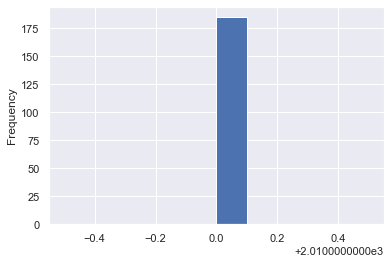

In [47]:
df_sales.groupby('Country')['Order Date'].min().dt.year.plot.hist()

<AxesSubplot:ylabel='Item Type'>

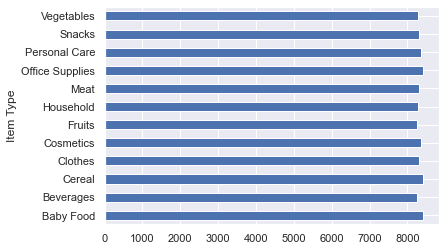

In [49]:
df_sales.groupby('Item Type').size().plot.barh()

In [51]:
df_sales['sales'] = df_sales['Units Sold']*df_sales['Unit Price']

In [52]:
df_sales.resample('Q',on='Order Date')['sales'].sum()

Order Date
2010-03-31    4.169192e+09
2010-06-30    4.318392e+09
2010-09-30    4.640546e+09
2010-12-31    4.401598e+09
2011-03-31    4.314693e+09
2011-06-30    4.357723e+09
2011-09-30    4.321529e+09
2011-12-31    4.525962e+09
2012-03-31    4.307104e+09
2012-06-30    4.442294e+09
2012-09-30    4.399271e+09
2012-12-31    4.475009e+09
2013-03-31    4.377007e+09
2013-06-30    4.390722e+09
2013-09-30    4.460767e+09
2013-12-31    4.576600e+09
2014-03-31    4.448490e+09
2014-06-30    4.536757e+09
2014-09-30    4.355888e+09
2014-12-31    4.528257e+09
2015-03-31    4.391531e+09
2015-06-30    4.355671e+09
2015-09-30    4.551465e+09
2015-12-31    4.493317e+09
2016-03-31    4.460873e+09
2016-06-30    4.240913e+09
2016-09-30    4.332828e+09
2016-12-31    4.429454e+09
2017-03-31    4.103185e+09
2017-06-30    4.453720e+09
2017-09-30    1.445914e+09
Freq: Q-DEC, Name: sales, dtype: float64

In [50]:
df_sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Date',
       'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost'],
      dtype='object')

In [53]:
df_sales['transaction_amount'] = df_sales['Units Sold']*(df_sales['Unit Price']-df_sales['Unit Cost'])

In [54]:
df_sales.resample('Q',on='Order Date')['transaction_amount'].sum()

Order Date
2010-03-31    1.252639e+09
2010-06-30    1.269370e+09
2010-09-30    1.365659e+09
2010-12-31    1.309076e+09
2011-03-31    1.265392e+09
2011-06-30    1.289305e+09
2011-09-30    1.281131e+09
2011-12-31    1.345882e+09
2012-03-31    1.282722e+09
2012-06-30    1.291652e+09
2012-09-30    1.279402e+09
2012-12-31    1.318095e+09
2013-03-31    1.316981e+09
2013-06-30    1.282565e+09
2013-09-30    1.308162e+09
2013-12-31    1.351080e+09
2014-03-31    1.292686e+09
2014-06-30    1.325841e+09
2014-09-30    1.279674e+09
2014-12-31    1.323928e+09
2015-03-31    1.290531e+09
2015-06-30    1.277693e+09
2015-09-30    1.331379e+09
2015-12-31    1.327359e+09
2016-03-31    1.329310e+09
2016-06-30    1.260813e+09
2016-09-30    1.281884e+09
2016-12-31    1.294943e+09
2017-03-31    1.215030e+09
2017-06-30    1.330370e+09
2017-09-30    4.385675e+08
Freq: Q-DEC, Name: transaction_amount, dtype: float64

In [55]:
df_sales['Item Type'].nunique()

12

In [79]:
items_fnb = ['Baby Food','Beverages','Cereal','Snacks']
items_personal = ['Cosmetics','Clothes','Personal Care']
items_fresh = ['Fruits','Meat','Vegetables']
items_house = ['Household','Office Supplies']

In [80]:
df_sales['item_group'] = ''
df_sales.loc[df_sales['Item Type'].isin(items_fnb),'item_group'] = 'FnB'
df_sales.loc[df_sales['Item Type'].isin(items_personal),'item_group'] = 'Personal'
df_sales.loc[df_sales['Item Type'].isin(items_fresh),'item_group'] = 'Fresh'
df_sales.loc[df_sales['Item Type'].isin(items_house),'item_group'] = 'Household'

In [81]:
df_sales[(df_sales['Order Date'].dt.quarter==2)&(df_sales['Order Date'].dt.year==2017)&(df_sales.item_group=='FnB')].groupby(['item_group','Country']).transaction_amount.sum().sort_values(ascending=False).head(10)

item_group  Country     
FnB         Estonia         4968871.63
            Albania         4868784.53
            Armenia         4611739.68
            Saudi Arabia    4418755.54
            Afghanistan     4262893.50
            El Salvador     4172642.73
            Lithuania       3941175.34
            Moldova         3911850.32
            Burundi         3893465.08
            Spain           3859767.99
Name: transaction_amount, dtype: float64

In [64]:
df_sales['Item Type'].unique()

array(['Snacks', 'Cosmetics', 'Fruits', 'Personal Care', 'Household',
       'Clothes', 'Vegetables', 'Office Supplies', 'Beverages', 'Meat',
       'Cereal', 'Baby Food'], dtype=object)

In [73]:
df_sales[(df_sales['Order Date'].dt.quarter==2)&(df_sales['Order Date'].dt.year==2017)].groupby(['Country']).sales.sum().sort_values(ascending=False).head(10)

Country
United Arab Emirates    53143804.08
Burkina Faso            50088567.54
Poland                  43529230.30
Nicaragua               41267666.98
South Africa            39716139.07
Namibia                 39082712.11
Morocco                 38491596.45
Bahrain                 38248873.82
Greece                  37865152.92
Azerbaijan              37604616.24
Name: sales, dtype: float64

In [72]:
df_sales[(df_sales['Order Date'].dt.quarter==2)&(df_sales['Order Date'].dt.year==2017)]['Order Date'].describe()

C:\Users\azka\AppData\Local\Temp/ipykernel_13936/1807867216.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_sales[(df_sales['Order Date'].dt.quarter==2)&(df_sales['Order Date'].dt.year==2017)]['Order Date'].describe()


count                    3307
unique                     91
top       2017-05-22 00:00:00
freq                       56
first     2017-04-01 00:00:00
last      2017-06-30 00:00:00
Name: Order Date, dtype: object

<AxesSubplot:ylabel='Item Type'>

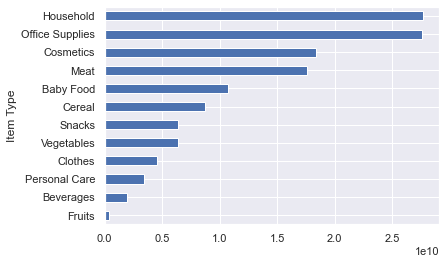

In [76]:
df_sales.groupby('Item Type').sales.sum().sort_values().plot.barh()

<AxesSubplot:ylabel='item_group'>

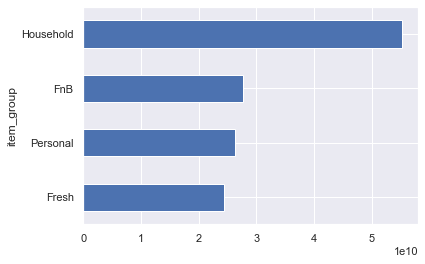

In [82]:
df_sales.groupby('item_group').sales.sum().sort_values().plot.barh()

In [88]:
df_sales.columns = [i.lower().replace(' ','_') for i in df_sales.columns]

In [89]:
df_sales.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_date',
       'order_id', 'ship_date', 'units_sold', 'unit_price', 'unit_cost',
       'sales', 'transaction_amount', 'item_group'],
      dtype='object')

In [90]:
df_sales['profit_margin'] = (df_sales.unit_price-df_sales.unit_cost)/df_sales.unit_price

In [ ]:
df.groupby('Location').resample('H')['Event'].count()

In [111]:
df_sales.groupby('item_type').resample('Q',on='order_date')['profit_margin'].mean().to_frame().reset_index()

,item_type,order_date,profit_margin
0,Baby Food,2010-03-31,0.375509
1,Baby Food,2010-06-30,0.375509
2,Baby Food,2010-09-30,0.375509
3,Baby Food,2010-12-31,0.375509
4,Baby Food,2011-03-31,0.375509
...,...,...,...
367,Vegetables,2016-09-30,0.409775
368,Vegetables,2016-12-31,0.409775
369,Vegetables,2017-03-31,0.409775
370,Vegetables,2017-06-30,0.409775


<AxesSubplot:xlabel='order_date', ylabel='profit_margin'>

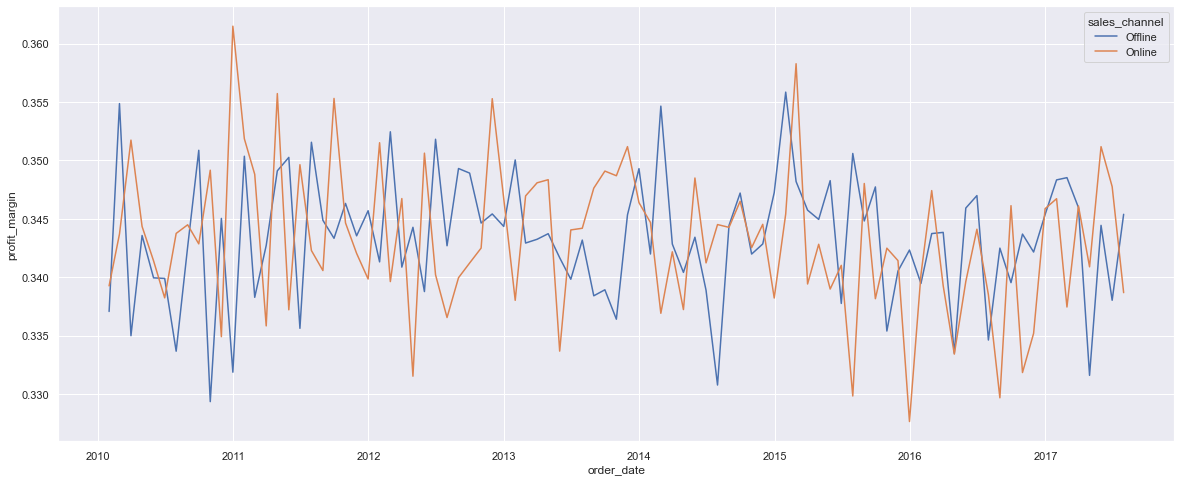

In [121]:
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df_sales.groupby('sales_channel').resample('M',on='order_date')['profit_margin'].mean().to_frame().reset_index(),x='order_date',y='profit_margin',hue='sales_channel',ax=ax)
# ax.set(ylim=(.25,.31))

<AxesSubplot:xlabel='order_date', ylabel='profit_margin'>

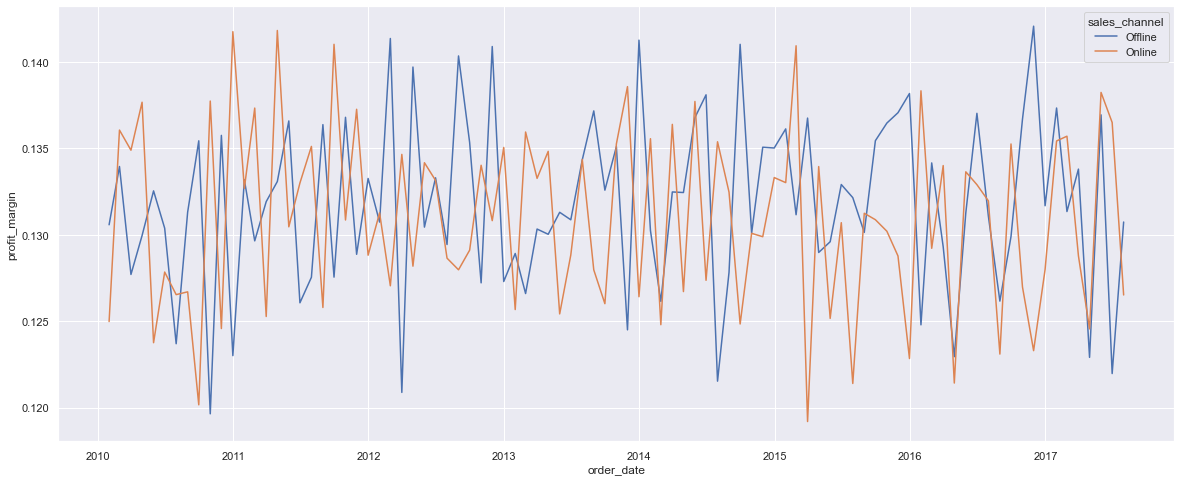

In [125]:
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df_sales.groupby('sales_channel').resample('M',on='order_date')['profit_margin'].std().to_frame().reset_index(),x='order_date',y='profit_margin',hue='sales_channel',ax=ax)
# ax.set(ylim=(.25,.31))

In [124]:
df_sales.groupby('sales_channel').resample('M',on='order_date')['profit_margin'].std()

sales_channel  order_date
Offline        2010-01-31    0.130576
               2010-02-28    0.133946
               2010-03-31    0.127703
               2010-04-30    0.129953
               2010-05-31    0.132536
                               ...   
Online         2017-03-31    0.128777
               2017-04-30    0.124556
               2017-05-31    0.138229
               2017-06-30    0.136492
               2017-07-31    0.126517
Name: profit_margin, Length: 182, dtype: float64

In [128]:
df_sales[df_sales.item_type=='Cereal'].unit_price.nunique()

1

In [139]:
df_sales.groupby('region').resample('Q',on='order_date')['region'].size().to_frame().rename(columns={'region':'total'}).reset_index()

,region,order_date,total
0,Asia,2010-03-31,442
1,Asia,2010-06-30,457
2,Asia,2010-09-30,483
3,Asia,2010-12-31,444
4,Asia,2011-03-31,493
...,...,...,...
212,Sub-Saharan Africa,2016-09-30,855
213,Sub-Saharan Africa,2016-12-31,822
214,Sub-Saharan Africa,2017-03-31,821
215,Sub-Saharan Africa,2017-06-30,835


<AxesSubplot:xlabel='order_date', ylabel='total'>

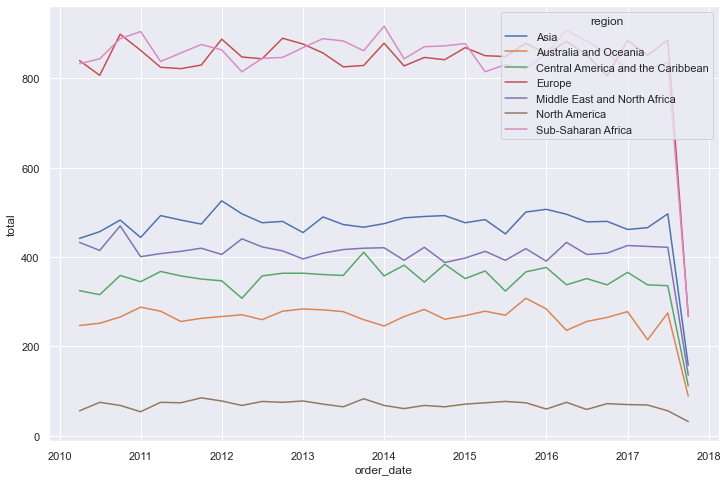

In [179]:
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(ax=ax,data=df_sales.groupby('region').resample('Q',on='order_date')['region'].size().to_frame().rename(columns={'region':'total'}).reset_index(),x='order_date',y='total',hue='region')

In [194]:
df_sales[df_sales.item_type=='Cereal'].set_index('order_date').groupby('region').resample('Q')['region'].size().to_frame().rename(columns={'region':'total'}).reset_index()

,region,order_date,total
0,Asia,2010-03-31,47
1,Asia,2010-06-30,33
2,Asia,2010-09-30,36
3,Asia,2010-12-31,43
4,Asia,2011-03-31,41
...,...,...,...
212,Sub-Saharan Africa,2016-09-30,79
213,Sub-Saharan Africa,2016-12-31,64
214,Sub-Saharan Africa,2017-03-31,59
215,Sub-Saharan Africa,2017-06-30,59


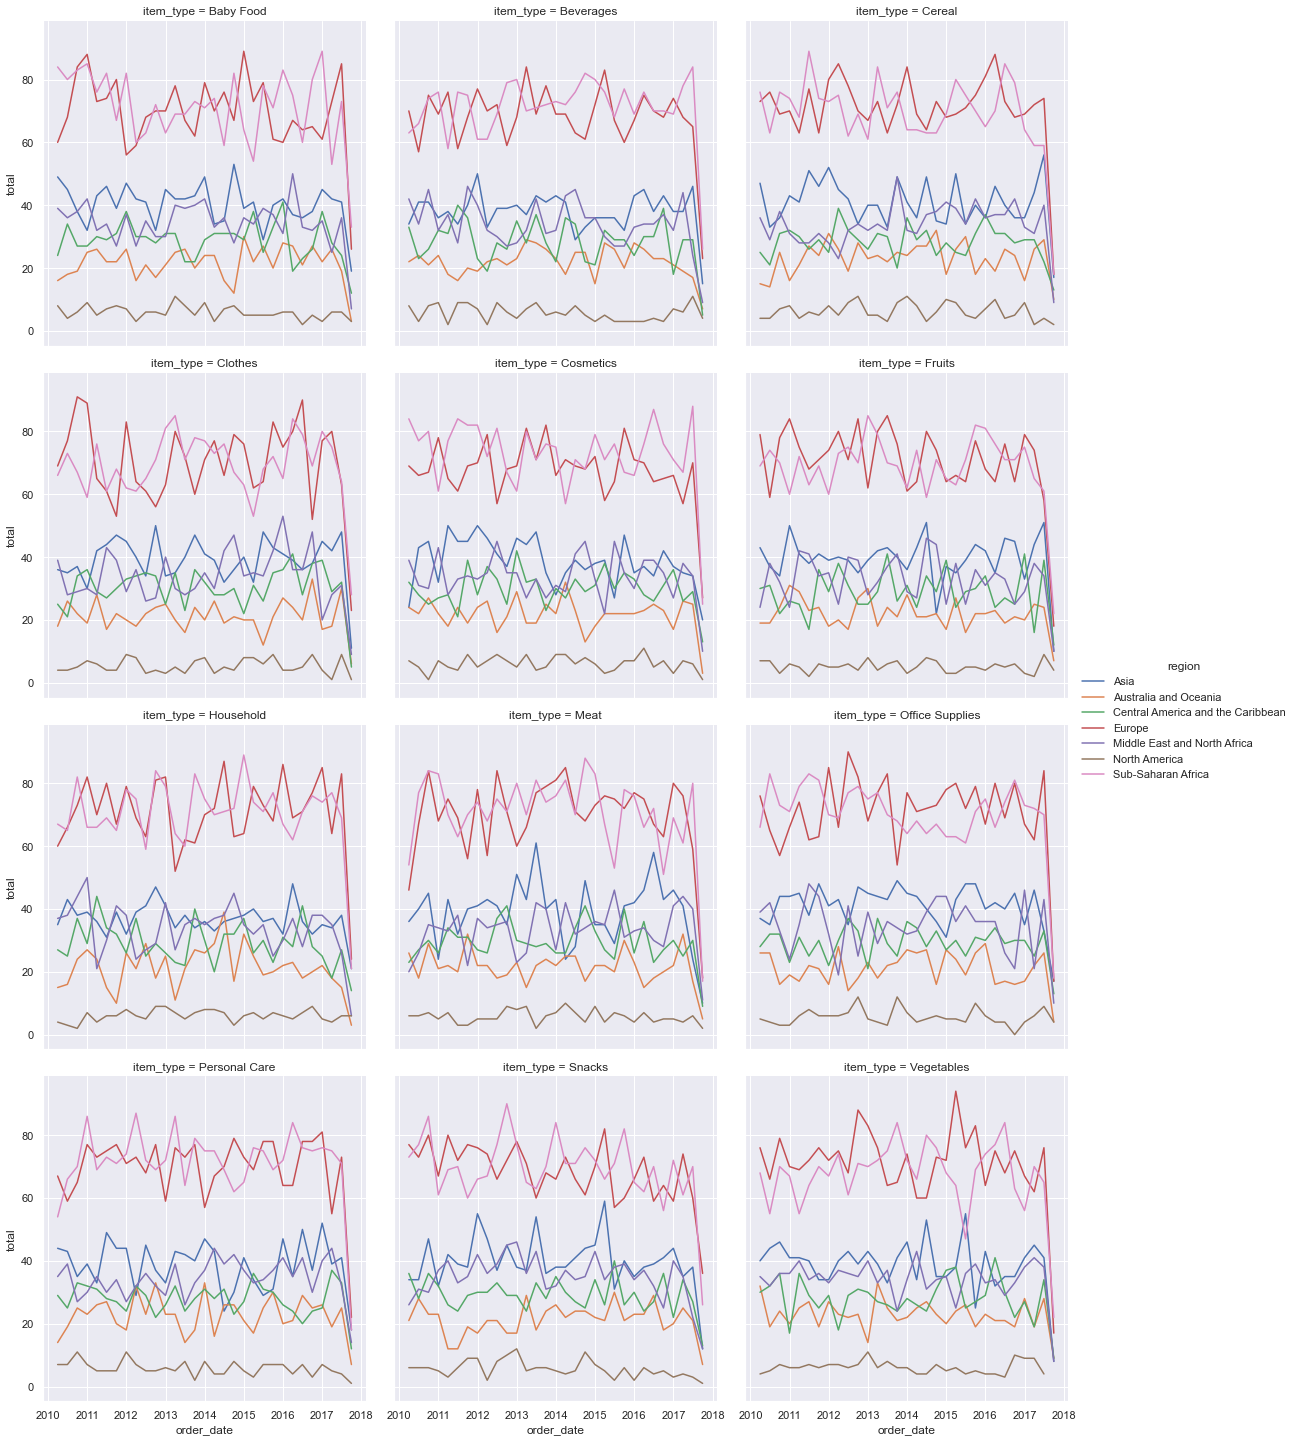

In [187]:
sns.relplot(data=df_sales.set_index('order_date').groupby(['region','item_type']).resample('Q')['region'].size().to_frame().rename(columns={'region':'total'}).reset_index(), x='order_date',y='total',hue='region',col='item_type',kind='line',col_wrap=3)

In [195]:
df_sales.resample('Q',on='order_date').sales.sum()

order_date
2010-03-31    4.169192e+09
2010-06-30    4.318392e+09
2010-09-30    4.640546e+09
2010-12-31    4.401598e+09
2011-03-31    4.314693e+09
2011-06-30    4.357723e+09
2011-09-30    4.321529e+09
2011-12-31    4.525962e+09
2012-03-31    4.307104e+09
2012-06-30    4.442294e+09
2012-09-30    4.399271e+09
2012-12-31    4.475009e+09
2013-03-31    4.377007e+09
2013-06-30    4.390722e+09
2013-09-30    4.460767e+09
2013-12-31    4.576600e+09
2014-03-31    4.448490e+09
2014-06-30    4.536757e+09
2014-09-30    4.355888e+09
2014-12-31    4.528257e+09
2015-03-31    4.391531e+09
2015-06-30    4.355671e+09
2015-09-30    4.551465e+09
2015-12-31    4.493317e+09
2016-03-31    4.460873e+09
2016-06-30    4.240913e+09
2016-09-30    4.332828e+09
2016-12-31    4.429454e+09
2017-03-31    4.103185e+09
2017-06-30    4.453720e+09
2017-09-30    1.445914e+09
Freq: Q-DEC, Name: sales, dtype: float64

In [206]:
df_sales[df_sales.order_date.dt.date>=pd.to_datetime('2013-07-01')].resample('W',on='order_date').sales.cumsum()

1450     1.145009e+06
4766     1.424379e+06
5834     2.251628e+06
7566     2.987211e+06
16776    4.433450e+06
             ...     
86995    2.544669e+08
87508    2.545376e+08
87537    2.555519e+08
87688    2.567645e+08
91295    2.609178e+08
Name: sales, Length: 53835, dtype: float64

In [198]:
df_sales.resample('Q',on='order_date').country.count()

order_date
2010-03-31    3176
2010-06-30    3166
2010-09-30    3434
2010-12-31    3300
2011-03-31    3286
2011-06-30    3263
2011-09-30    3299
2011-12-31    3376
2012-03-31    3248
2012-06-30    3284
2012-09-30    3349
2012-12-31    3323
2013-03-31    3359
2013-06-30    3302
2013-09-30    3332
2013-12-31    3364
2014-03-31    3263
2014-06-30    3326
2014-09-30    3306
2014-12-31    3314
2015-03-31    3285
2015-06-30    3196
2015-09-30    3369
2015-12-31    3330
2016-03-31    3369
2016-06-30    3289
2016-09-30    3225
2016-12-31    3309
2017-03-31    3185
2017-06-30    3307
2017-09-30    1066
Freq: Q-DEC, Name: country, dtype: int64

In [199]:
df_sales.order_date.max()

Timestamp('2017-07-28 00:00:00')

In [200]:
df_sales.ship_date.max()

Timestamp('2017-09-16 00:00:00')

In [202]:
df_sales.groupby('item_type')['order_date'].min()

item_type
Baby Food         2010-01-01
Beverages         2010-01-01
Cereal            2010-01-01
Clothes           2010-01-01
Cosmetics         2010-01-01
Fruits            2010-01-01
Household         2010-01-01
Meat              2010-01-01
Office Supplies   2010-01-01
Personal Care     2010-01-01
Snacks            2010-01-01
Vegetables        2010-01-01
Name: order_date, dtype: datetime64[ns]

In [214]:
df_sales[(df_sales.order_date.dt.quarter==2)&(df_sales.order_date.dt.year==2017)].groupby('country').sales.sum().sort_values(ascending=False).head(10)

country
United Arab Emirates    53143804.08
Burkina Faso            50088567.54
Poland                  43529230.30
Nicaragua               41267666.98
South Africa            39716139.07
Namibia                 39082712.11
Morocco                 38491596.45
Bahrain                 38248873.82
Greece                  37865152.92
Azerbaijan              37604616.24
Name: sales, dtype: float64

In [216]:
df_sales[(df_sales.order_date.dt.quarter==1)&(df_sales.order_date.dt.year==2017)&(df_sales.country.isin(df_sales[(df_sales.order_date.dt.quarter==2)&(df_sales.order_date.dt.year==2017)].groupby('country').sales.sum().sort_values(ascending=False).head(10).index))].groupby('country').sales.sum()

country
Azerbaijan              20571337.38
Bahrain                 16245230.96
Burkina Faso            33700351.89
Greece                  16342582.72
Morocco                 20783202.29
Namibia                 13579720.03
Nicaragua               26780182.03
Poland                  32495003.40
South Africa            15909545.26
United Arab Emirates    21453868.80
Name: sales, dtype: float64

In [212]:
df_sales[(df_sales.order_date.dt.quarter==2)&(df_sales.order_date.dt.year==2017)&(df_sales.sales_channel=='Offline')].groupby('country').sales.sum().sort_values(ascending=False).head(10)

country
Burkina Faso    36249644.24
Moldova         29796239.16
Poland          26241426.53
Russia          25361302.53
Nicaragua       24820871.55
Greece          23930319.24
Morocco         23166906.97
Pakistan        22767546.92
Azerbaijan      22562132.08
Hungary         22541887.60
Name: sales, dtype: float64

<AxesSubplot:ylabel='item_type'>

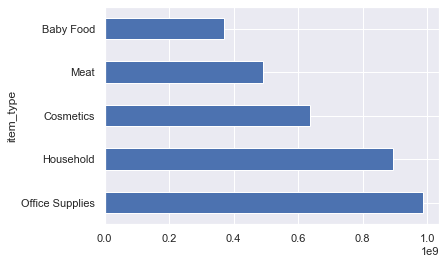

In [218]:
df_sales[(df_sales.order_date.dt.quarter==2)&(df_sales.order_date.dt.year==2017)].groupby('item_type').sales.sum().sort_values(ascending=False).head(5).plot.barh()